In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit,prange

@njit(parallel=True)
def exp_numba(arr,ffteCarrier,wp,w,dw):
    # result = np.empty_like(arr)
    # for i in prange(arr.shape[0]):
    result = ffteCarrier*2j*(wp-w)/dw/(1+2j*(wp-w)/dw)*np.exp(arr)
    return result
plt.rcParams.update({'font.size': 25,'font.family': 'serif',"font.serif": ['Times New Roman'],'mathtext.fontset':'stix',  'lines.markersize':10,'lines.linewidth':2,"figure.figsize": (12,8)})


In [4]:
#Parameters:
g = 1.
phi = 0.
dI = 0.
dQ = 0.
dw = 0.002*2*np.pi # Assuming to be 20 kHz
wm = 500 * dw # Assuming to be 500 * dw = 10 MHz
# wm = 1*2*np.pi
# dw = wm/50.
wc = 50.*2*np.pi
beta1 = 1.84
beta2 = 1.01
# w0 = 40*2*np.pi
w0 = 0
tlength = 100
samplerate=2000
num = samplerate*tlength+1
t = np.linspace(0,tlength,int(num))
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
ts = t[:samplerate*2+1]
# wp = np.linspace(-dw*150,dw*150,101)+wc+w0
# wp = np.linspace(-wm*2.5,wm*2.5,21)+wc+w0
# wp = np.concatenate((np.arange(-wm*2.5,-wm*2-2*dw,(0.5*wm-2*dw)/5),np.arange(-wm*2-2*dw,-wm*2+2*dw,dw/4),np.arange(-wm*2+2*dw,-wm-2*dw,(wm-4*dw)/10),np.arange(-wm-2*dw,-wm+2*dw,dw/4),\
#                       np.arange(-wm+2*dw,-2*dw,(wm-4*dw)/10),np.arange(-2*dw,2*dw,dw/4),np.arange(2*dw,wm-2*dw,(wm-4*dw)/10),np.arange(wm-2*dw,wm+2*dw,dw/4),np.arange(wm+2*dw,2*wm-2*dw,(wm-4*dw)/10),\
#                         np.arange(2*wm-2*dw,2*wm+2*dw,dw/4),np.linspace(wm*2+2*dw,wm*2.5,5)))
wp = np.concatenate((np.arange(-wm*2.5,-wm*2.05,0.45*wm/5),np.arange(-wm*2.05,-wm*1.95,dw/2),np.arange(-wm*1.95,-wm*1.05,wm*0.9/10),np.arange(-wm*1.05,-wm*0.95,dw/2),\
                      np.arange(-wm*0.95,-wm*0.05,wm*0.9/10),np.arange(-wm*0.05,wm*0.05,dw/4),np.arange(wm*0.05,wm*0.95,(wm*0.9)/10),np.arange(wm*0.95,wm*1.05,dw/2),np.arange(wm*1.05,wm*1.95,(wm*0.9)/10),\
                        np.arange(wm*1.95,wm*2.05,dw/2),np.linspace(wm*2.05,wm*2.5,5)))
wp = wp+wc+w0
print(len(wp))
inPhase = np.sin(beta2*np.sin(wm*t))
Quadrature = np.cos(beta2*np.sin(wm*t))

# eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
#     (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
# eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
# freq = np.fft.fftfreq(num,1/samplerate)
# ffteCarrier = np.fft.fft(eCarrier,norm='forward')
# size = 1
# signal = 0
# for i in np.array([-0.5*dw+w0+wc,0.5*dw+w0+wc]):
#     error_sum = np.zeros(samplerate*2+1,dtype=complex)
#     for j in range(len(ffteCarrier)):
#         w = 2.*np.pi*freq[j]
#         error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],i,w,dw) #Reflection
#     signal += -size*np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
#     size = -1
#     print(signal)


651


In [130]:
#Parameters:
g = 1.
phi = 0.
dI = 0.
dQ = 0.
dw = 0.025*2*np.pi # Assuming to be 20 kHz
wm = 20 * dw # Assuming to be 500 * dw = 10 MHz
# wm = 1*2*np.pi
# dw = wm/50.
wc = 50.*2*np.pi
beta1 = 1.84
beta2 = 1.01
# w0 = 40*2*np.pi
w0 = 0
tlength = 1000
samplerate=200
num = samplerate*tlength+1
t = np.linspace(0,tlength,int(num))
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
ts = t[:samplerate*2+1]
# wp = np.linspace(-dw*150,dw*150,101)+wc+w0
# wp = np.linspace(-wm*2.5,wm*2.5,21)+wc+w0
# wp = np.concatenate((np.arange(-wm*2.5,-wm*2-2*dw,(0.5*wm-2*dw)/5),np.arange(-wm*2-2*dw,-wm*2+2*dw,dw/4),np.arange(-wm*2+2*dw,-wm-2*dw,(wm-4*dw)/10),np.arange(-wm-2*dw,-wm+2*dw,dw/4),\
#                       np.arange(-wm+2*dw,-2*dw,(wm-4*dw)/10),np.arange(-2*dw,2*dw,dw/4),np.arange(2*dw,wm-2*dw,(wm-4*dw)/10),np.arange(wm-2*dw,wm+2*dw,dw/4),np.arange(wm+2*dw,2*wm-2*dw,(wm-4*dw)/10),\
#                         np.arange(2*wm-2*dw,2*wm+2*dw,dw/4),np.linspace(wm*2+2*dw,wm*2.5,5)))
wp = np.concatenate((np.arange(-wm*2.5,-wm*2.05,0.45*wm/5),np.arange(-wm*2.05,-wm*1.95,dw/4),np.arange(-wm*1.95,-wm*1.05,wm*0.9/10),np.arange(-wm*1.05,-wm*0.95,dw/4),\
                      np.arange(-wm*0.95,-wm*0.05,wm*0.9/10),np.arange(-wm*0.05,wm*0.05,dw/8),np.arange(wm*0.05,wm*0.95,(wm*0.9)/10),np.arange(wm*0.95,wm*1.05,dw/4),np.arange(wm*1.05,wm*1.95,(wm*0.9)/10),\
                        np.arange(wm*1.95,wm*2.05,dw/4),np.linspace(wm*2.05,wm*2.5,5)))
wp = wp+wc+w0
print(len(wp))
inPhase = np.sin(beta2*np.sin(wm*t))
Quadrature = np.cos(beta2*np.sin(wm*t))

# eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
#     (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
# eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
# freq = np.fft.fftfreq(num,1/samplerate)
# ffteCarrier = np.fft.fft(eCarrier,norm='forward')
# size = 1
# signal = 0
# for i in np.array([-0.5*dw+w0+wc,0.5*dw+w0+wc]):
#     error_sum = np.zeros(samplerate*2+1,dtype=complex)
#     for j in range(len(ffteCarrier)):
#         w = 2.*np.pi*freq[j]
#         error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],i,w,dw) #Reflection
#     signal += -size*np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
#     size = -1
#     print(signal)


99


Standard PDH Signal:

In [16]:
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*
                                                                                      t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
eCarrier = eCarrier+1j*eCarrier_imag
error = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin(wm*ts)),ts)
    error[i]=signal
plt.plot(wp/2./np.pi,error,'.-')

KeyboardInterrupt: 

The ESB Error Signal:

99
0%

1%

2%

3%

4%

5%

6%

7%

8%

9%

10%

11%

12%

13%

14%

15%

16%

17%

18%

19%

20%

21%

22%

23%

24%

25%

26%

27%

28%

29%

30%

31%

32%

33%

34%

35%

36%

37%

38%

39%

40%

41%

42%

43%

44%

45%

46%

47%

48%

49%

50%

51%

52%

53%

54%

55%

56%

57%

58%

59%

60%

61%

62%

63%

64%

65%

66%

67%

68%

69%

70%

71%

72%

73%

74%

75%

76%

77%

78%

79%

80%

81%

82%

83%

84%

85%

86%

87%

88%

89%

90%

91%

92%

93%

94%

95%

96%

97%

98%



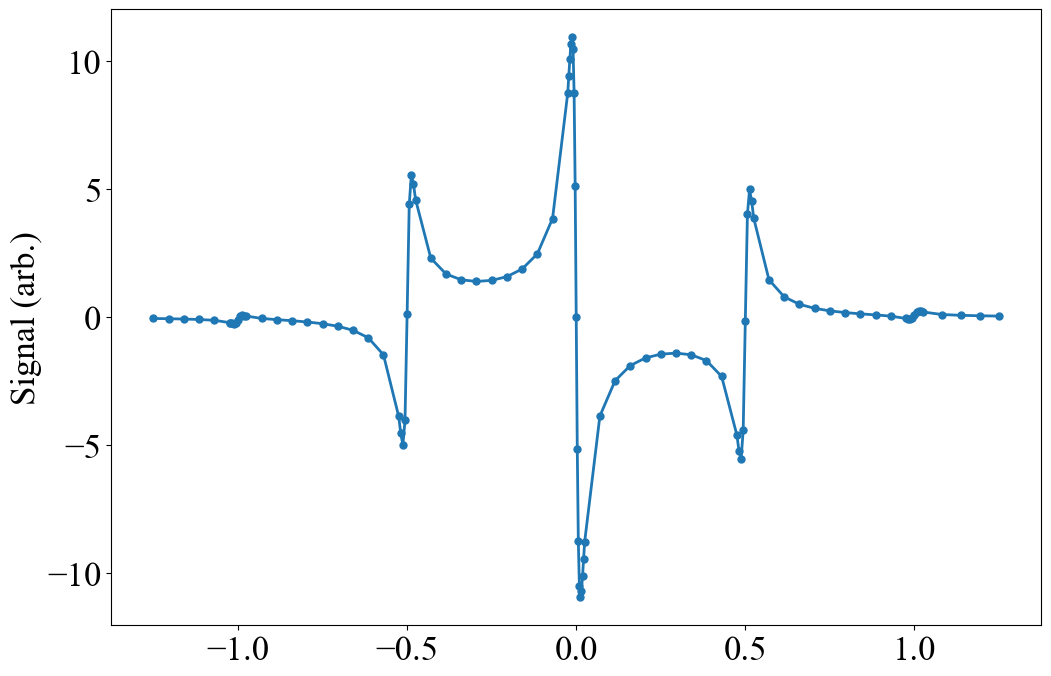

In [131]:
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
error1 = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
last = -1
this = 0
print(len(wp))
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts) #Demodulation
    error1[i]=signal
    this=i*100//len(wp)
    if this != last:
        last = this
        print(f"{last}%\n")
# plt.title("No Error")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,error1,'.-')
with open('error1s.npy', 'wb') as f:
    np.save(f,(wp-w0-wc)/2./np.pi)
    np.save(f,error1)
plt.savefig("perfect.svg",bbox_inches='tight')

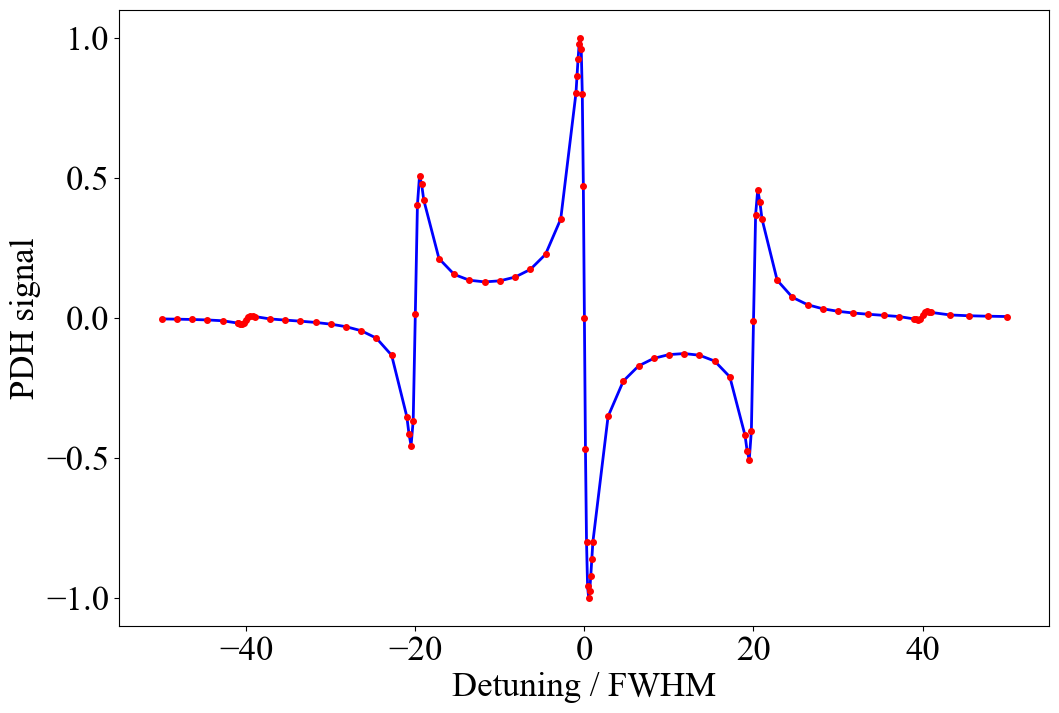

In [140]:
normalizer = np.max(np.abs(error1))
plt.plot((wp-w0-wc)/dw,error1/normalizer,'-',color= 'b')
plt.plot((wp-w0-wc)/dw,error1/normalizer,'.',markersize=8,color='r')
plt.ylabel("PDH signal")
plt.xlabel("Detuning / FWHM")
plt.savefig("perfect.svg",bbox_inches='tight')
plt.savefig("perfect.pdf",bbox_inches='tight',dpi=300)
plt.savefig("perfect.png",bbox_inches='tight',dpi=300)

40
0%

2%

5%

7%

10%

12%

15%

17%

20%

22%

25%

27%

30%

32%

35%

37%

40%

42%

45%

47%

50%

52%

55%

57%

60%

62%

65%

67%

70%

72%

75%

77%

80%

82%

85%

87%

90%

92%

95%

97%



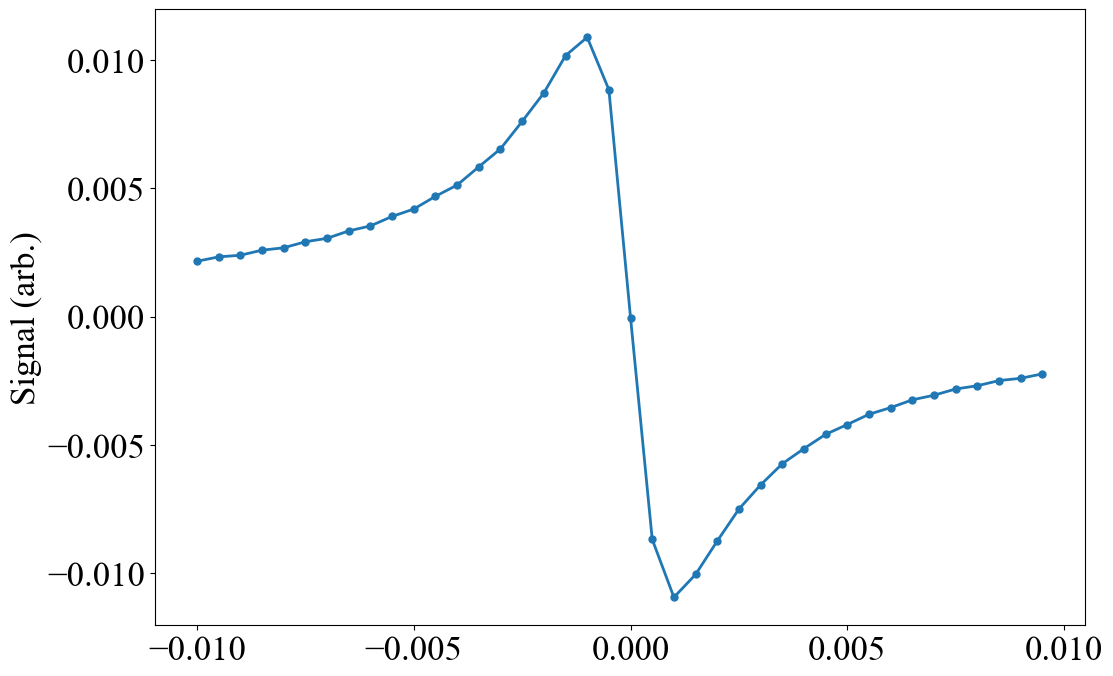

In [111]:
wp = np.arange(-dw*5,5 * dw,dw/4)
wp = wp+wc+w0
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
error1 = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
last = -1
this = 0
print(len(wp))
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts) #Demodulation
    error1[i]=signal
    this=i*100//len(wp)
    if this != last:
        last = this
        print(f"{last}%\n")
# plt.title("No Error")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,error1,'.-')
# with open('error1.npy', 'wb') as f:
#     np.save(f,(wp-w0-wc)/2./np.pi)
#     np.save(f,error1)
# plt.savefig("perfect.svg",bbox_inches='tight')

0.0


array([-0.03045576, -0.02744423, -0.02492209, -0.0227795 , -0.02093699,
       -0.01933576, -0.01793135, -0.01668956, -0.01558365, -0.01459241,
       -0.01369884, -0.01288912, -0.01215191, -0.01147782])

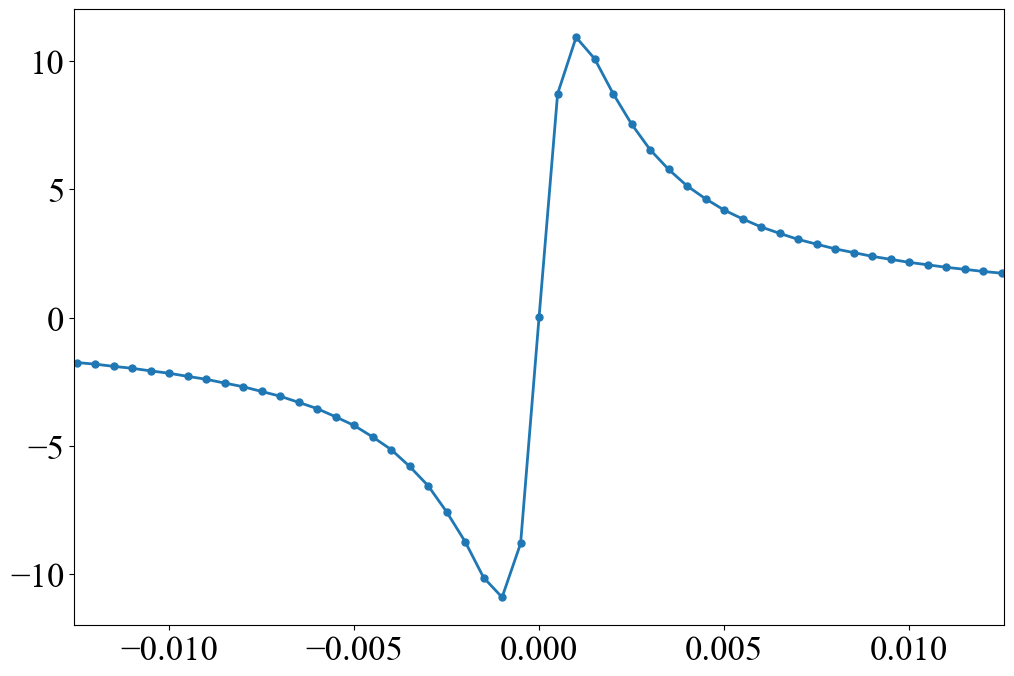

In [69]:
plt.xlim(-dw,dw)
plt.plot((wp-w0-wc)/2./np.pi,error1,'.-')
print(np.trapz((np.sin((wm)*ts)),ts))
error1[66:80]

220
0%

1%

2%

3%

4%

5%

6%

7%

8%

9%

10%

11%

12%

13%

14%

15%

16%

17%

18%

19%

20%

21%

22%

23%

24%

25%

26%

27%

28%

29%

30%

31%

32%

33%

34%

35%

36%

37%

38%

39%

40%

41%

42%

43%

44%

45%

46%

47%

48%

49%

50%

51%

52%

53%

54%

55%

56%

57%

58%

59%

60%

61%

62%

63%

64%

65%

66%

67%

68%

69%

70%

71%

72%

73%

74%

75%

76%

77%

78%

79%

80%

81%

82%

83%

84%

85%

86%

87%

88%

89%

90%

91%

92%

93%

94%

95%

96%

97%

98%

99%



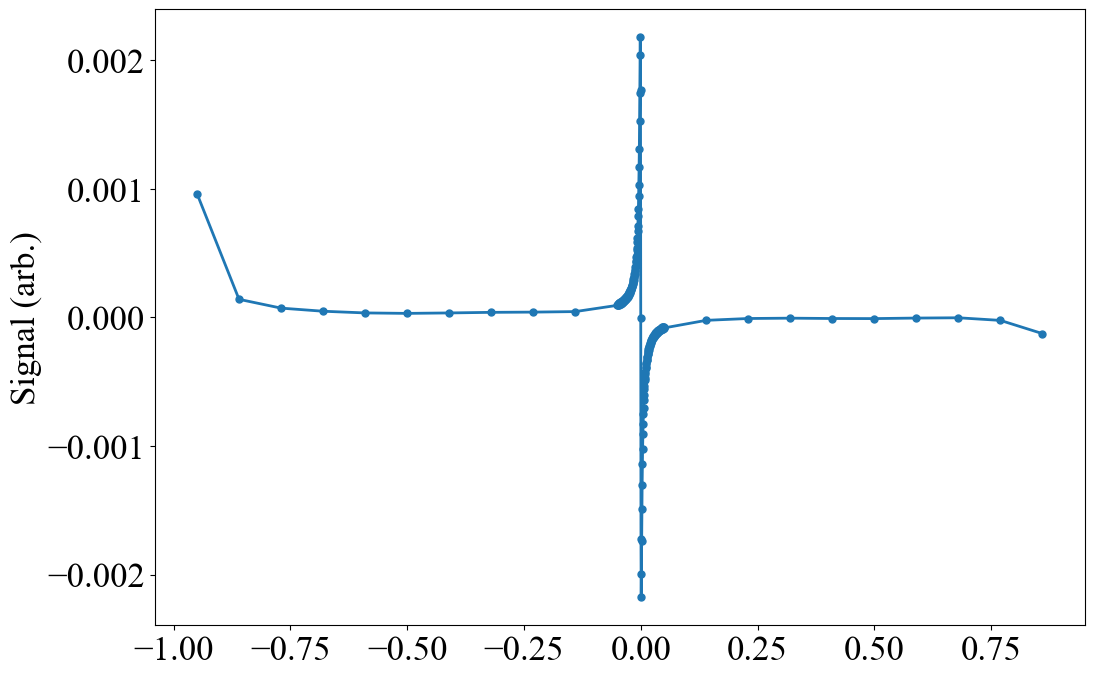

In [74]:
wp = np.concatenate((np.arange(-wm*0.95,-wm*0.05,wm*0.9/10),np.arange(-wm*0.05,wm*0.05,dw/4),np.arange(wm*0.05,wm*0.95,(wm*0.9)/10)))
wp = wp+wc+w0
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
error1 = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
last = -1
this = 0
print(len(wp))
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts) #Demodulation
    error1[i]=signal
    this=i*100//len(wp)
    if this != last:
        last = this
        print(f"{last}%\n")
# plt.title("No Error")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,error1,'.-')
# with open('error1.npy', 'wb') as f:
#     np.save(f,(wp-w0-wc)/2./np.pi)
#     np.save(f,error1)
# plt.savefig("perfect.svg",bbox_inches='tight')

Notice that at $x=0$ the error signal is not zero. I suspect that is caused by the fact that the number of the sampled point is not large enough. However, the generation of a signle plot at current setting takes around 5 min. It would be very time-consuming trying to increase the number of points further without careful optimization of the computational efficiency.

At $g=10$:

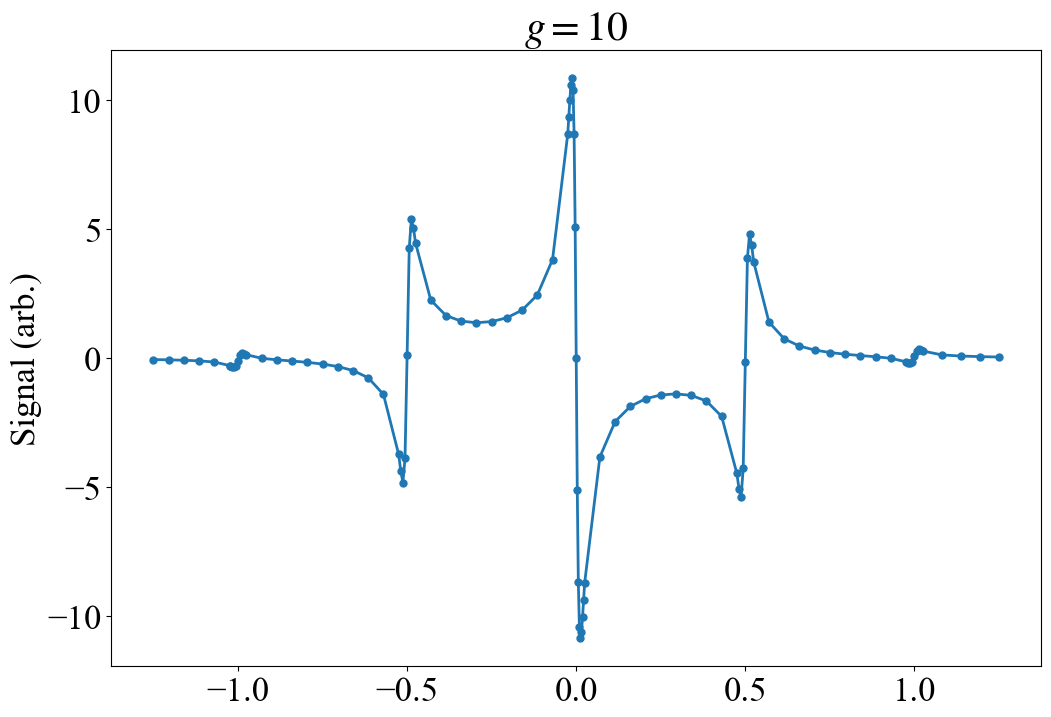

In [132]:
g = 1.2
phi = 0.
dI = 0.
dQ = 0.
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
errorg = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
    errorg[i]=signal
plt.title(r"$g=10$")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,errorg,'.-')
with open('errorgss.npy', 'wb') as f:
    np.save(f,(wp-w0-wc)/2./np.pi)
    np.save(f,errorg)

At $\phi=\pi/2$:

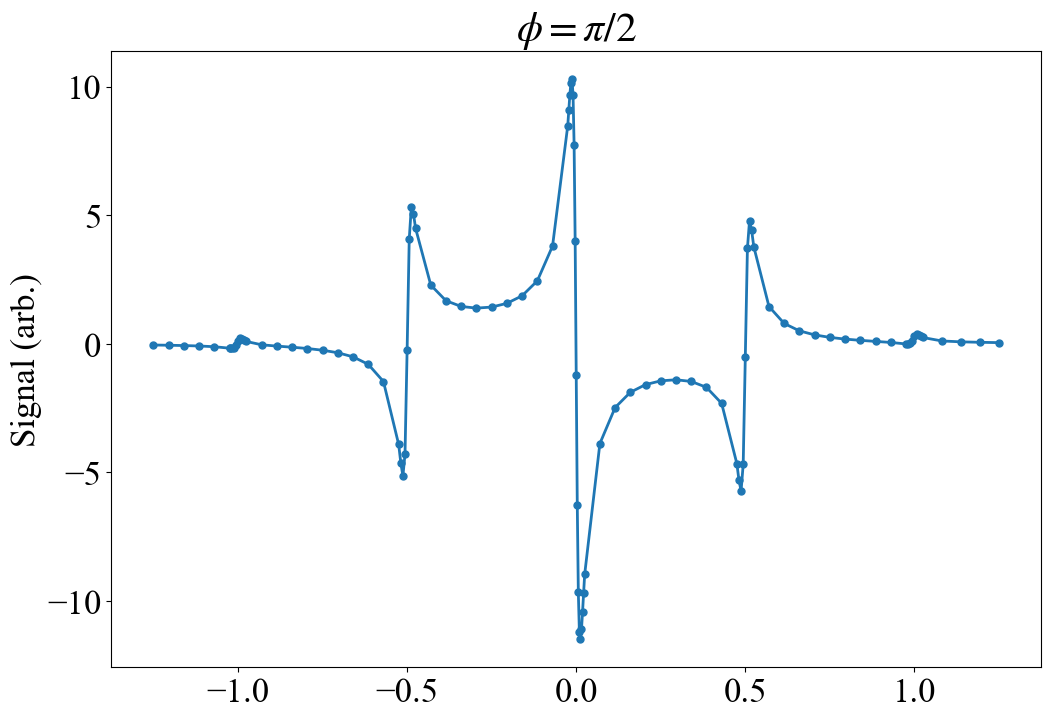

In [136]:
g = 1.
phi = 5*np.pi/180.
dI = 0.
dQ = 0.
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
errorp = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
    errorp[i]=signal
plt.title(r"$\phi=\pi/2$")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,errorp,'.-')
with open('errorps.npy', 'wb') as f:
    np.save(f,(wp-w0-wc)/2./np.pi)
    np.save(f,errorp)

At $\Delta I=1$:

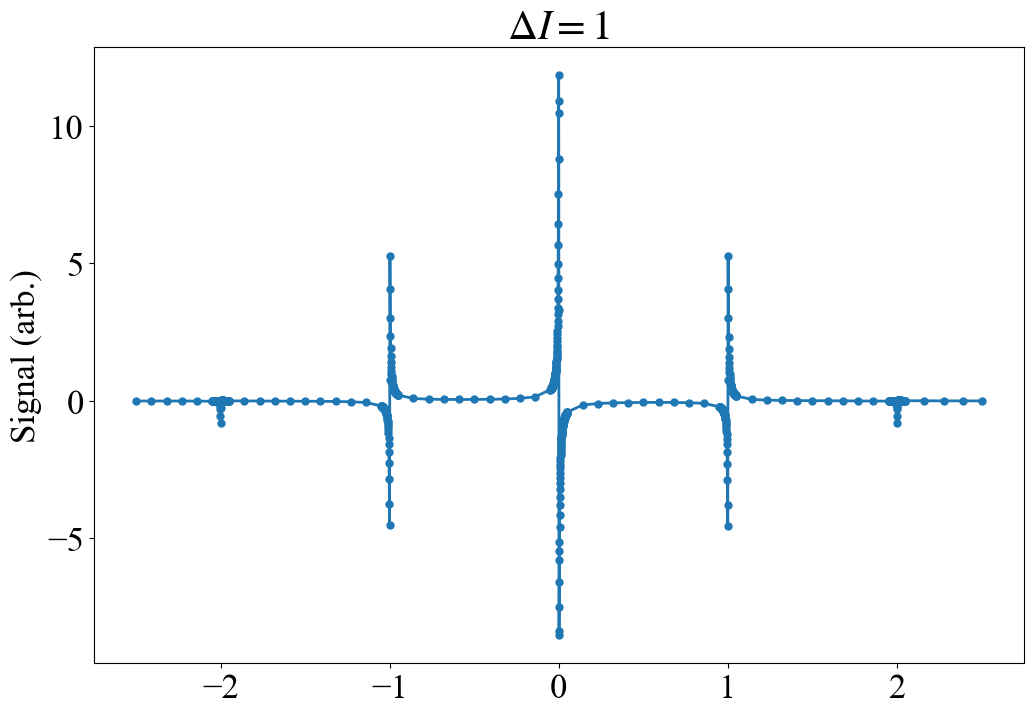

In [152]:
g = 1.
phi =0.
dI = 0.2
dQ = 0.
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
errori = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
    errori[i]=signal
plt.title(r"$\Delta I=1$")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,errori,'.-')
with open('errori.npy', 'wb') as f:
    np.save(f,(wp-w0-wc)/2./np.pi)
    np.save(f,errori)

In [99]:
# plt.figure()
# plt.title("No Error")
# plt.ylabel("Signal (arb.)")
# plt.plot((wp-w0)/2./np.pi,error1,'.-')
# plt.savefig("perfect.svg",bbox_inches='tight')
# plt.savefig("perfect.jpg",dpi=300 ,bbox_inches='tight')
# plt.figure()
# plt.title(r"$g=10$")
# plt.ylabel("Signal (arb.)")
# plt.plot((wp-w0)/2./np.pi,errorg,'.-')
# plt.savefig("g-imbalance.svg",bbox_inches='tight')
# plt.savefig("g-imbalance.jpg",dpi=300 ,bbox_inches='tight')
# plt.figure()
# plt.title(r"$\phi=\pi/2$")
# plt.ylabel("Signal (arb.)")
# plt.plot((wp-w0)/2./np.pi,errorp,'.-')
# plt.savefig("phi-imbalance.svg",bbox_inches='tight')
# plt.savefig("phi-imbalance.jpg",dpi=300 ,bbox_inches='tight')
# plt.figure()
# plt.title(r"$\Delta I=1$")
# plt.ylabel("Signal (arb.)")
# plt.plot((wp-w0)/2./np.pi,errori,'.-')
# plt.savefig("I-offset.svg",bbox_inches='tight')
# plt.savefig("I-offset.jpg",dpi=300 ,bbox_inches='tight')


At $\Delta Q=1$:

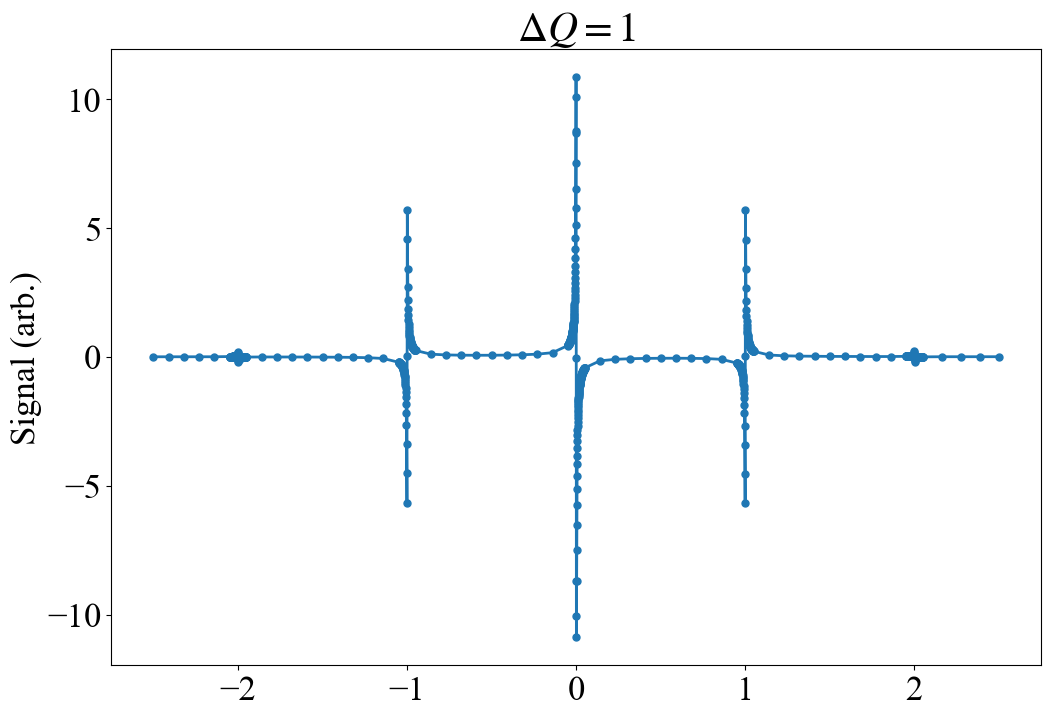

In [153]:
g = 1.
phi =0.
dI = 0.
dQ = 0.2
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
eCarrier = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.cos(wc*t)+\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.sin(wc*t)
eCarrier_imag = (alpha1*np.cos(-phi/2)*inPhase+alpha2*np.sin(-phi/2)*Quadrature+dI)*np.sin(wc*t)-\
    (alpha1*np.sin(-phi/2)*inPhase+alpha2*np.cos(-phi/2)*Quadrature+dQ)*np.cos(wc*t)
# eCarrier = eCarrier+1j*eCarrier_imag
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
errorq = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
    errorq[i]=signal
plt.title(r"$\Delta Q=1$")
plt.ylabel("Signal (arb.)")
plt.plot((wp-w0-wc)/2./np.pi,errorq,'.-')
with open('errorq.npy', 'wb') as f:
    np.save(f,(wp-w0-wc)/2./np.pi)
    np.save(f,errorq)

The following is the analysis of the error signal value and slope at $x=0$ with respect to different errors. Notice since that the error signal value at $x=0$ is not zero at simulation of perfect modulation, whether the traces of signal value at $x=0$ make much sense is questionable.

In [10]:
zeroptg=[]
slopeg=[]
sizeg = []
changelist = np.arange(-0.5,0.6,0.1)
for change in changelist:
    g = 10**change
    phi = 0.
    dI = 0.
    dQ = 0.
    alpha1 = g*np.sqrt(2/(1+g**2))
    alpha2 = np.sqrt(2/(1+g**2))
    wp = np.array([-0.1*dw,0,0.1*dw])+w0+wc
    eCarrier = (alpha1*np.sin(beta2*np.sin(wm*t))+dI)*np.cos(wc*t) + (alpha2*np.cos(beta2*np.sin(wm*t)+phi)+dQ)*np.sin(wc*t)
    eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
    error = np.zeros(len(wp))
    freq = np.fft.fftfreq(num,1/samplerate)
    ffteCarrier = np.fft.fft(eCarrier,norm='forward')
    ts = t[:samplerate*2+1]
    for i in range(len(wp)):
        error_sum = np.zeros(len(ts),dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
        signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        error[i]=signal
    k = (error[2]-error[0])/dw/0.2
    zeroptg.append(-error[1]/k/wc)
    slopeg.append(k)
    size = 1
    signal = 0
    for i in [-0.5*dw+w0+wc,0.5*dw+w0+wc]:
        error_sum = np.zeros(samplerate*2+1,dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],i,w,dw) #Reflection
        signal += -size*np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        size = -1
    sizeg.append(signal)
with open('g_im_final.npy', 'wb') as f:
    np.save(f,changelist)
    np.save(f,zeroptg)
    np.save(f,slopeg)
    np.save(f,sizeg)

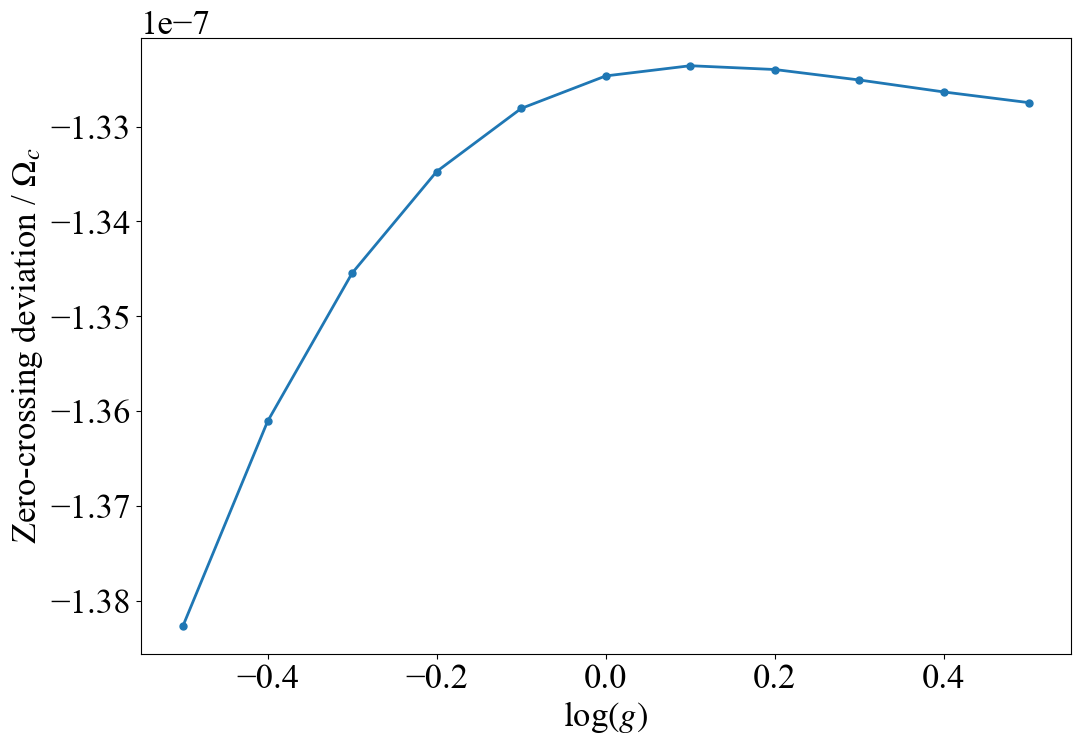

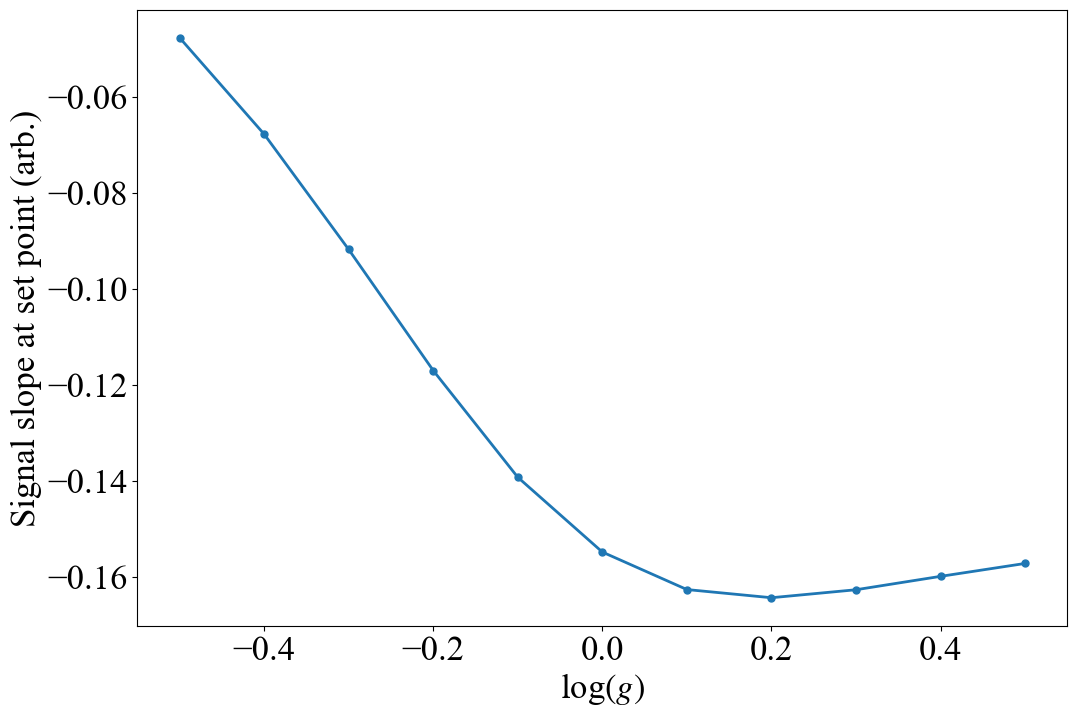

In [7]:
plt.ylabel(r"Zero-crossing deviation / $\Omega_c$")
plt.xlabel(r"log$(g)$")
plt.plot(changelist,zeroptg* 500000,'.-')
# plt.savefig("g_z.svg")
plt.figure()
plt.ylabel("Signal slope at set point (arb.)")
plt.xlabel(r"log$(g)$")
plt.plot(changelist,slopeg,'.-')
# plt.savefig("g_sl.svg")

In [102]:
np.trapz((np.sin((wc+wm)*t))[:samplerate*2+1],t[:samplerate*2+1])#Demodulation

-1.5265566588595902e-16

In [18]:
zeroptp=[]
slopep=[]
sizep = []
changelist = np.arange(-10,11,2)
for change in changelist:
    g = 1
    phi = change/180*np.pi
    dI = 0.
    dQ = 0.
    alpha1 = g*np.sqrt(2/(1+g**2))
    alpha2 = np.sqrt(2/(1+g**2))
    wp = np.array([-0.1*dw,0,0.1*dw])+w0+wc
    eCarrier = (alpha1*np.sin(beta2*np.sin(wm*t))+dI)*np.cos(wc*t) + (alpha2*np.cos(beta2*np.sin(wm*t)+phi)+dQ)*np.sin(wc*t)
    eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
    error = np.zeros(len(wp))
    freq = np.fft.fftfreq(num,1/samplerate)
    ffteCarrier = np.fft.fft(eCarrier,norm='forward')
    for i in range(len(wp)):
        error_sum = np.zeros(samplerate*2+1,dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
        signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        error[i]=signal
    k = (error[2]-error[0])/dw/0.2
    zeroptp.append(-error[1]/k/wc)
    slopep.append(k)
    size = 1
    signal = 0
    for i in [-0.5*dw+w0+wc,0.5*dw+w0+wc]:
        error_sum = np.zeros(samplerate*2+1,dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],i,w,dw) #Reflection
        signal += -size*np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        size = -1
    sizep.append(signal)
# with open('phi_im_final.npy', 'wb') as f:
#     np.save(f,changelist)
#     np.save(f,zeroptp)
#     np.save(f,slopep)
#     np.save(f,sizep)


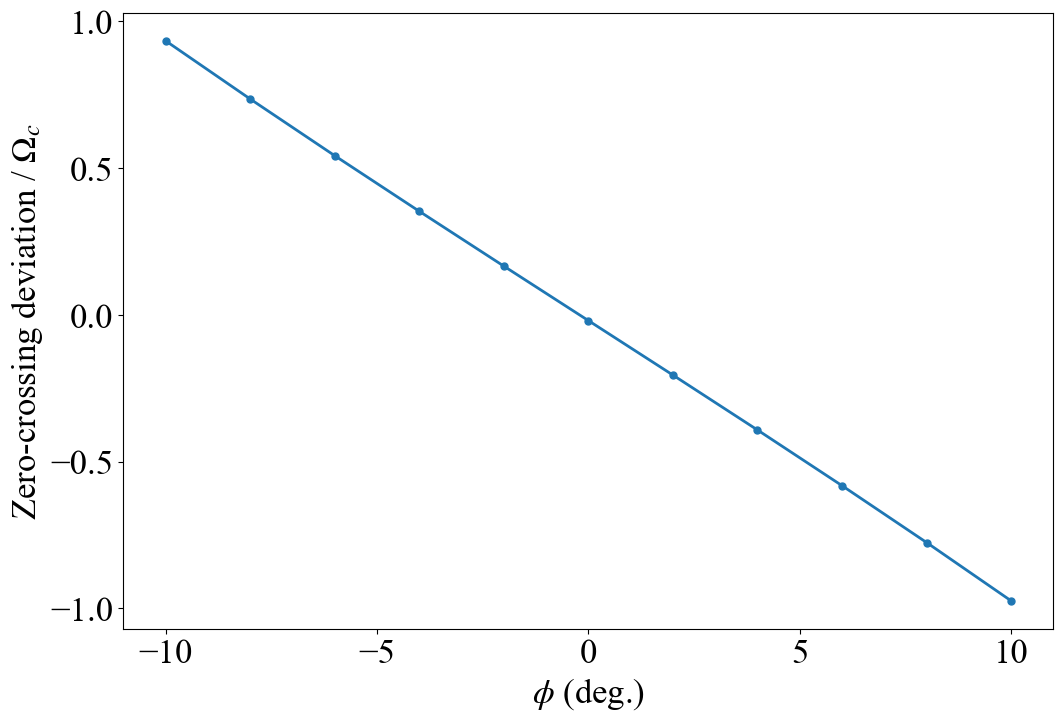

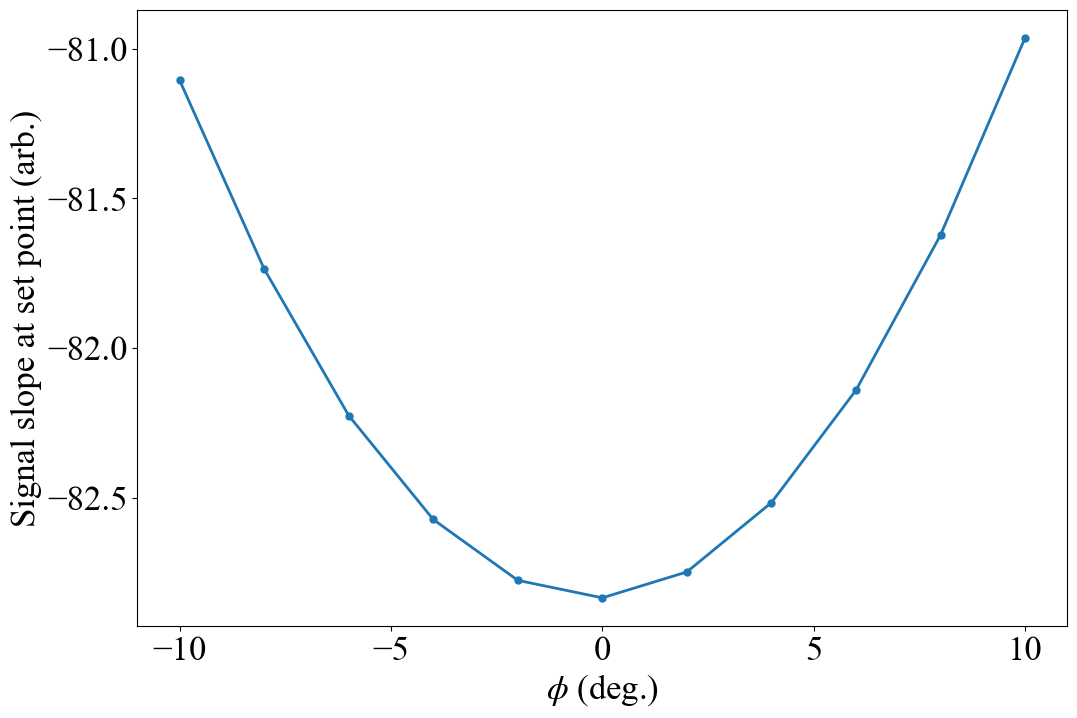

In [19]:
plt.ylabel(r"Zero-crossing deviation / $\Omega_c$")
plt.xlabel(r"$\phi$ (deg.)")
plt.plot(changelist,np.array(zeroptp)* 500000,'.-')
plt.figure()
plt.ylabel("Signal slope at set point (arb.)")
plt.xlabel(r"$\phi$ (deg.)")
plt.plot(changelist,slopep,'.-')

In [5]:
zeropti=[]
slopei=[]
sizei=[]
changelist = np.arange(-0.5,0.6,0.1)
for change in changelist:
    g = 1
    phi = 0
    dI = change
    dQ = 0.
    alpha1 = g*np.sqrt(2/(1+g**2))
    alpha2 = np.sqrt(2/(1+g**2))
    wp = np.array([-0.1*dw,0,0.1*dw])+w0+wc
    eCarrier = (alpha1*np.sin(beta2*np.sin(wm*t))+dI)*np.cos(wc*t) + (alpha2*np.cos(beta2*np.sin(wm*t)+phi)+dQ)*np.sin(wc*t)
    eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
    error = np.zeros(len(wp))
    freq = np.fft.fftfreq(num,1/samplerate)
    ffteCarrier = np.fft.fft(eCarrier,norm='forward')
    for i in range(len(wp)):
        error_sum = np.zeros(len(ts),dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
        signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        error[i]=signal
    k = (error[2]-error[0])/dw/0.2
    zeropti.append(-error[1]/k/wc)
    slopei.append(k)
    size = 1
    signal = 0
    for i in [-0.5*dw+w0+wc,0.5*dw+w0+wc]:
        error_sum = np.zeros(samplerate*2+1,dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],i,w,dw) #Reflection
        signal += -size*np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        size = -1
    sizei.append(signal)
# with open('di_im_final.npy', 'wb') as f:
#     np.save(f,changelist)
#     np.save(f,zeropti)
#     np.save(f,slopei)
#     np.save(f,sizei)


0
0
0
0


KeyboardInterrupt: 

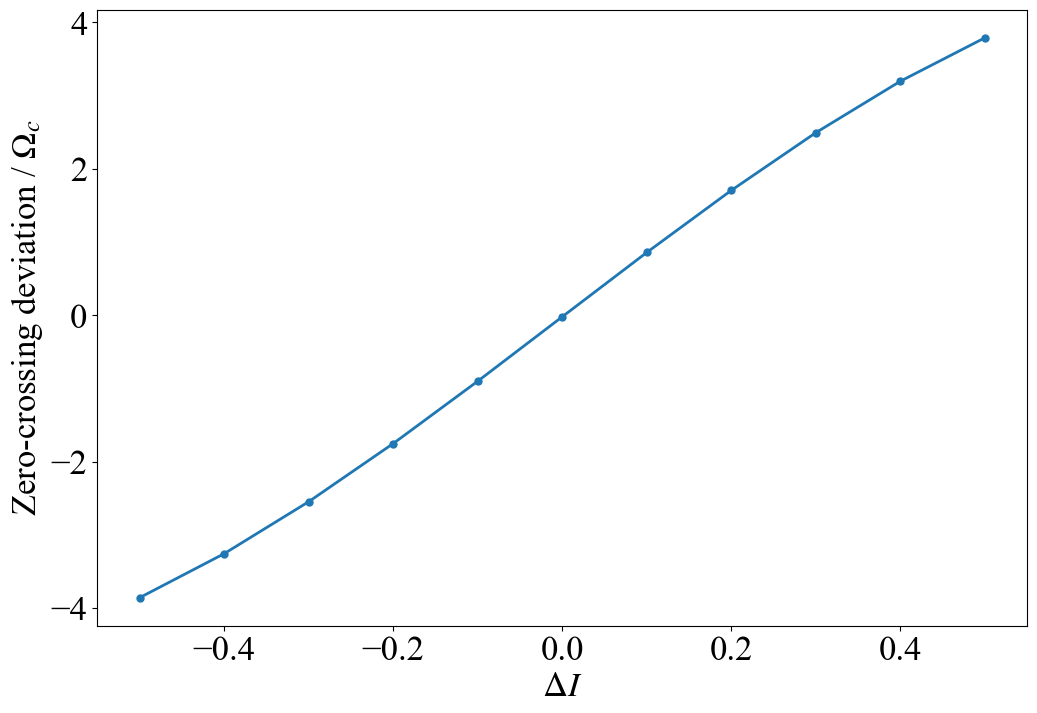

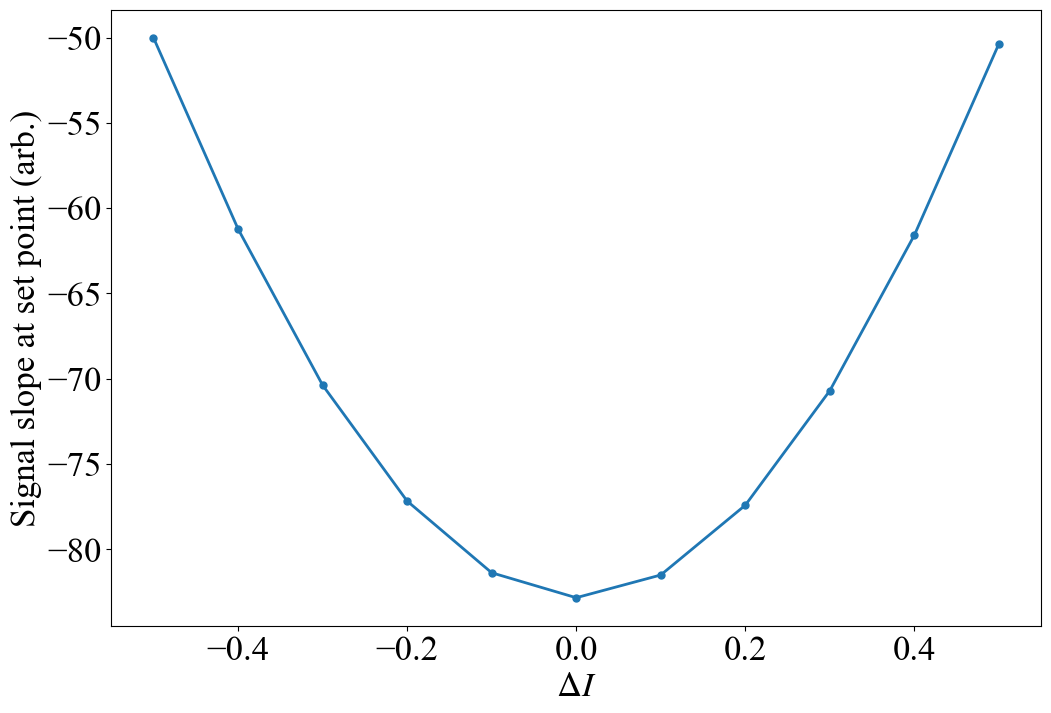

In [23]:
plt.ylabel(r"Zero-crossing deviation / $\Omega_c$")
plt.xlabel(r"$\Delta I$")
plt.plot(changelist,np.array(zeropti)* 500000,'.-')
plt.figure()
plt.ylabel("Signal slope at set point (arb.)")
plt.xlabel(r"$\Delta I$")
plt.plot(changelist,slopei,'.-')

In [13]:
zeroptq=[]
slopeq=[]
sizeq=[]
changelist = np.arange(-0.5,0.6,0.1)
for change in changelist:
    g = 1
    phi = 0
    dI = 0.
    dQ = change
    alpha1 = g*np.sqrt(2/(1+g**2))
    alpha2 = np.sqrt(2/(1+g**2))
    wp = np.array([-0.1*dw,0,0.1*dw])+w0+wc
    eCarrier = (alpha1*np.sin(beta2*np.sin(wm*t))+dI)*np.cos(wc*t) + (alpha2*np.cos(beta2*np.sin(wm*t)+phi)+dQ)*np.sin(wc*t)
    eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
    error = np.zeros(len(wp))
    freq = np.fft.fftfreq(num,1/samplerate)
    ffteCarrier = np.fft.fft(eCarrier,norm='forward')
    for i in range(len(wp)):
        error_sum = np.zeros(len(ts),dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
        signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        error[i]=signal
    k = (error[2]-error[0])/dw/0.2
    zeroptq.append(-error[1]/k/wc)
    slopeq.append(k)
    size = 1
    signal = 0
    for i in [-0.5*dw+w0+wc,0.5*dw+w0+wc]:
        error_sum = np.zeros(samplerate*2+1,dtype=complex)
        for j in range(len(ffteCarrier)):
            w = 2.*np.pi*freq[j]
            error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],i,w,dw) #Reflection
        signal += -size*np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
        size = -1
    sizeq.append(signal)
with open('dq_im_final.npy', 'wb') as f:
    np.save(f,changelist)
    np.save(f,zeroptq)
    np.save(f,slopeq)
    np.save(f,sizeq)

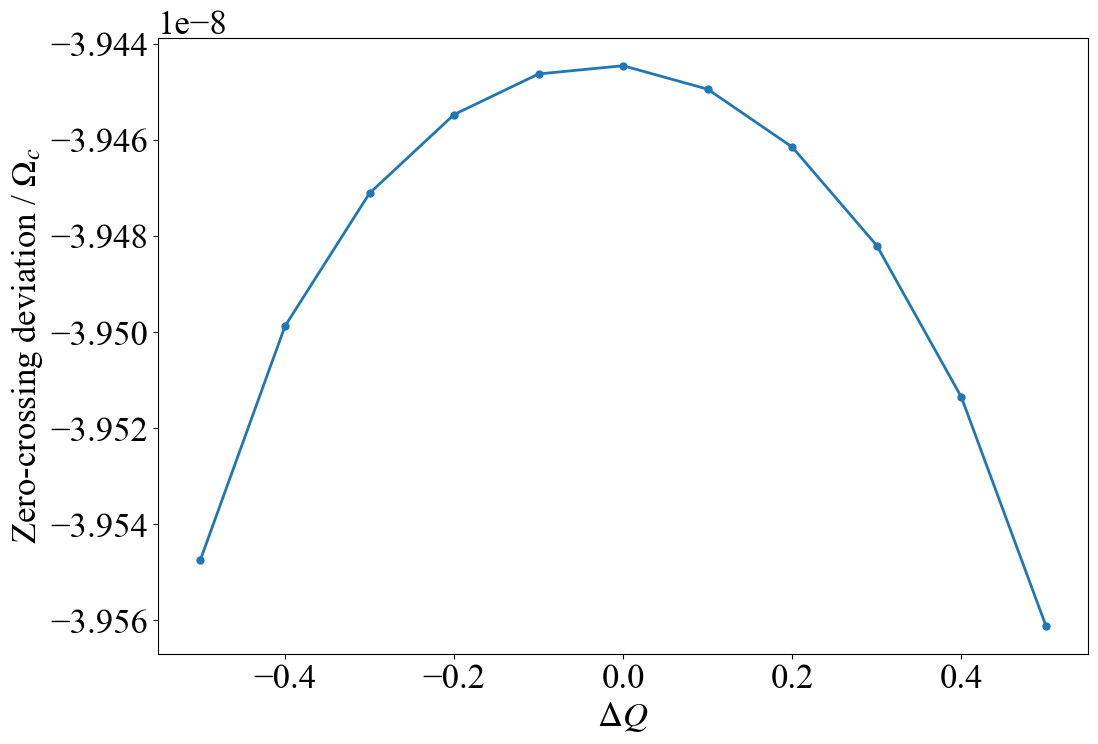

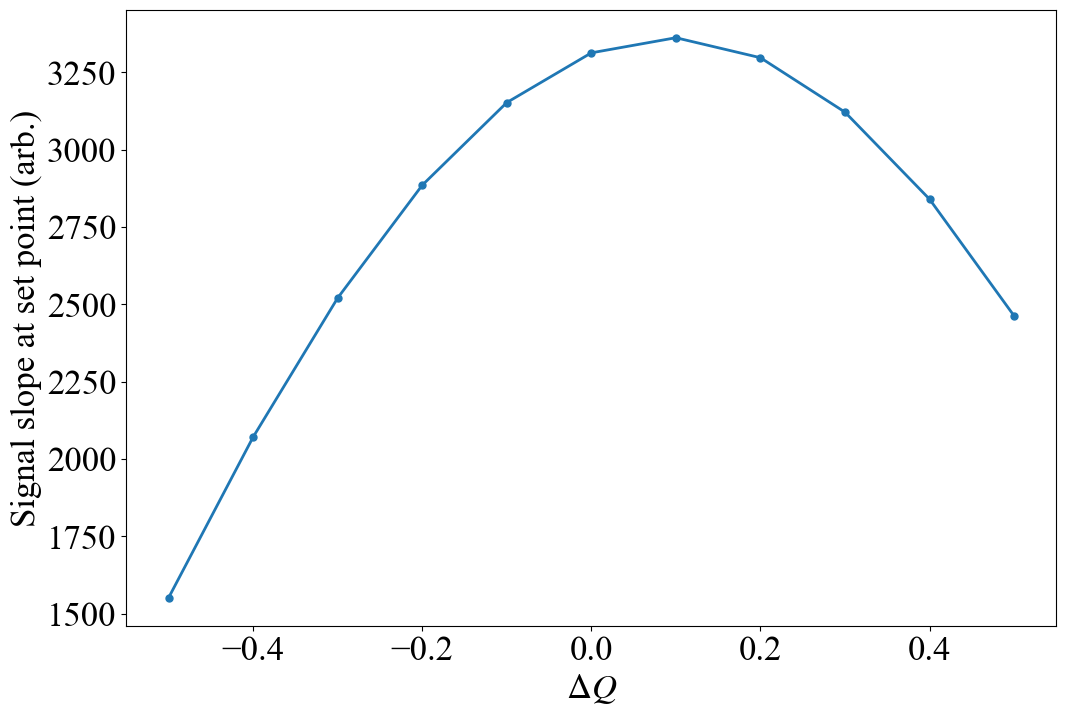

In [65]:
plt.ylabel(r"Zero-crossing deviation / $\Omega_c$")
plt.xlabel(r"$\Delta Q$")
plt.plot(changelist,zeroptq* 500000,'.-')
plt.figure()
plt.ylabel("Signal slope at set point (arb.)")
plt.xlabel(r"$\Delta Q$")
plt.plot(changelist,slopeq,'.-')

In [20]:
from scipy.special import jv
def gW(x):
    return jv(1,x)/jv(0,x)
xdw = np.array([-0.01*dw,0,0.01*dw])
eta = np.square(jv(0,beta1*beta2**3/3)*jv(0,beta1*beta2**2/8)*jv(0,beta1*beta2*(2-beta2**2)/4))*jv(0,beta1*(beta2**2-4)/4)
sim = np.square(eta)*4*xdw/dw/(1+4*np.square(xdw/dw))*gW(beta1*beta2/4*(2-beta2**2))*gW(beta1*(beta2**2/4-1))
print(sim)

g = 1.
phi = 0.
dI = 0.
dQ = 0.
dw = 0.002*2*np.pi # Assuming to be 20 kHz
wm = 500 * dw # Assuming to be 500 * dw = 10 MHz
# wm = 1*2*np.pi
# dw = wm/50.
wc = 50.*2*np.pi
beta1 = 1.84
beta2 = 1.01
# w0 = 40*2*np.pi
w0 = 0
tlength = 10000
samplerate=200
num = samplerate*tlength+1
t = np.linspace(0,tlength,int(num))
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
ts = t[:samplerate*2+1]
alpha1 = g*np.sqrt(2/(1+g**2))
alpha2 = np.sqrt(2/(1+g**2))
wp = np.array([-0.01*dw,0,0.01*dw])+w0+wc
eCarrier = (alpha1*np.sin(beta2*np.sin(wm*t))+dI)*np.cos(wc*t) + (alpha2*np.cos(beta2*np.sin(wm*t)+phi)+dQ)*np.sin(wc*t)
eCarrier = np.exp(1j*(w0*t+beta1*eCarrier))
error = np.zeros(len(wp))
freq = np.fft.fftfreq(num,1/samplerate)
ffteCarrier = np.fft.fft(eCarrier,norm='forward')
for i in range(len(wp)):
    error_sum = np.zeros(len(ts),dtype=complex)
    for j in range(len(ffteCarrier)):
        w = 2.*np.pi*freq[j]
        error_sum -= exp_numba(1j*w*ts,ffteCarrier[j],wp[i],w,dw) #Reflection
    print(np.sum(np.square(np.abs(error_sum))))
    signal =-np.trapz((np.square(np.abs(error_sum))*np.sin((wm)*ts)),ts)#Demodulation
    error[i]=signal
print(error)

[ 0.00148747 -0.         -0.00148747]


KeyboardInterrupt: 

C:\Users\tujun\AppData\Local\Temp\ipykernel_16240\1456446582.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(a/b)


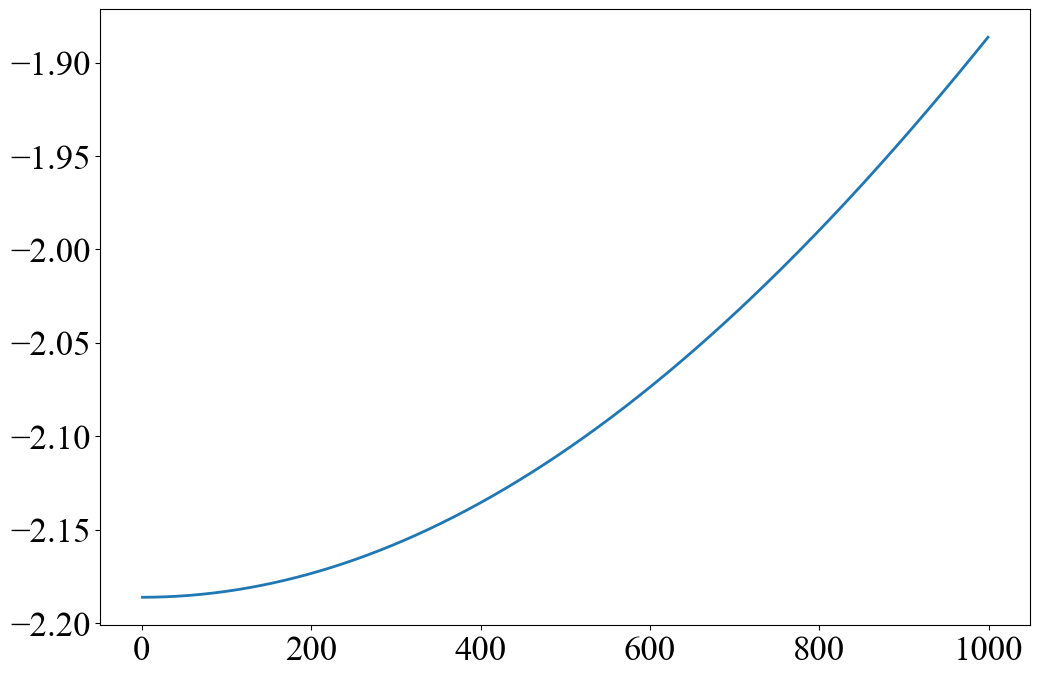

In [26]:
beta1x = np.linspace(0,1,1000)
a = 4*gW(beta1x*beta2/4*(2-beta2**2))*gW(beta1x*(beta2**2/4-1))*np.square(np.square(jv(0,beta1x*beta2**3/3)*jv(0,beta1x*beta2**2/8)*jv(0,beta1x*beta2*(2-beta2**2)/4))*jv(0,beta1x*(beta2**2-4)/4))
# a = jv(0,beta1x*beta2/2)**2*jv(1,beta1x)*gW(beta1x*beta2/2)
b =jv(1,beta1x)**2*jv(1,beta2)*jv(0,beta2)
plt.plot(a/b)